# Locally Weighted Regression

1)Read and Normalise the dataset

2)Generate W

3)No training is involved, directly make predictions using closed form solution we derived
    (X'WX)inv * X'WY where X' is X_Transpose
    
4)Find the best value for Tau(Brandwidth parameter)[Cross Validation]
    

## Loading Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dfx = pd.read_csv('/home/shaggy/Machine_Learning/Linear_Regression/Datasets/weightedX.csv')
dfy = pd.read_csv('/home/shaggy/Machine_Learning/Linear_Regression/Datasets/weightedY.csv')

In [4]:
x = dfx.values
y = dfy.values

print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


## Normalise the Data

In [5]:
x = (x-x.mean())/x.std()

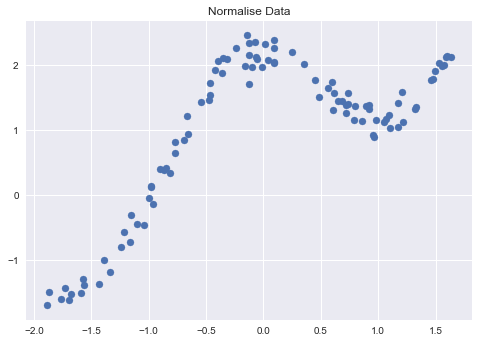

In [8]:
plt.title('Normalise Data')
plt.style.use('seaborn')
plt.scatter(x,y)
plt.show()

# Find out W(m*m) diagonal Matrix

In [18]:
def getW(query_point,X,tau):
    M = X.shape[0]  # number of elements in the dataset
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi =X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi - x),(xi - x).T)/(-2*tau*tau))
    
    return W

In [21]:
X = np.mat(x)
Y = np.mat(y)

M = X.shape[0]

W = getW(-1,X,0.5 )

print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


# 3. Make Predictions

In [28]:
def predict(X,Y,query_x,tau):
    ones = np.ones((M,1)) # M rows and 1 columns /scalar 
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    # theta - (X'WX)inv * X'WY
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
    return theta,pred
    
    

In [30]:
theta,prediction = predict(X,Y,1.0,1.0)

In [31]:
print(prediction)

[[1.59417694]]


# 4. Visualise Prediction and analysis

In [38]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    xo = np.array(X)
    yo = np.array(Y)
    plt.title("Tau/Bandwidth param %.2f"%tau)
    plt.scatter(xo,yo)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

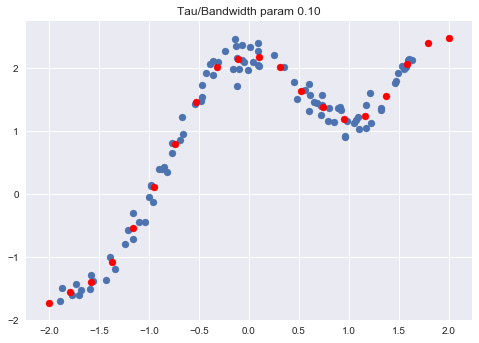

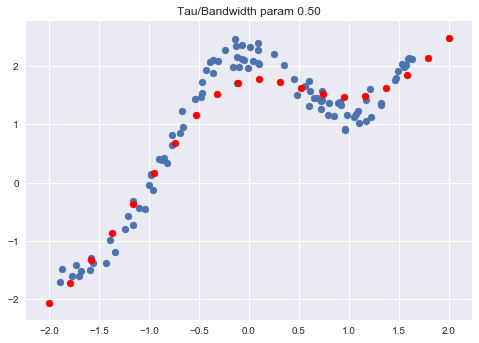

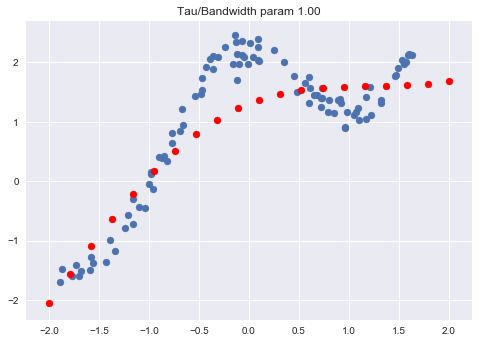

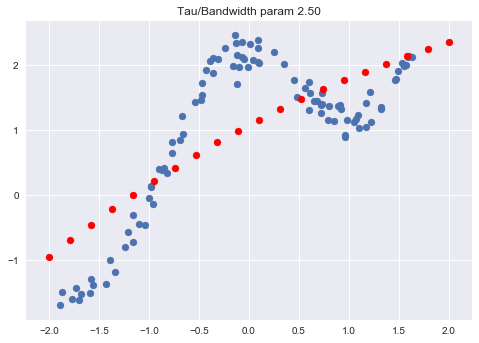

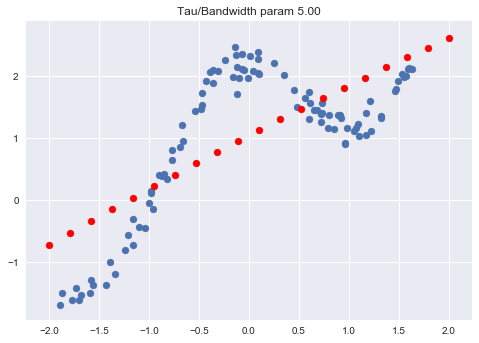

In [39]:
taus = [0.1,0.5,1,2.5,5]
for t in taus:
    plotPrediction(t)